# Sensitivity analysis

In [140]:
from SALib.sample import saltelli, fast_sampler
from SALib.analyze import sobol, fast
from SALib.plotting.bar import plot as barplot
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

# function for reading csv files
def pd_read_pattern(pattern, sep):
    files = glob.glob(pattern)
    df = pd.DataFrame()
    for f in files:
        df = df.append(pd.read_csv(f, sep=sep))
    return df.reset_index(drop=True)

# function to remove files
def removeFiles(pattern):
    files = glob.glob(pattern)
    for file in files:
        try:
            os.remove(file)
        except:
            print("Error while deleting file : ", file)

# read output files
def readOutput(read_raw_files, path, output_path, result_file_name, parameter_file_name):
    if (read_raw_files):
        df = pd_read_pattern(path + "group*.csv", sep=";")
        params = pd_read_pattern(path + "par*.csv", sep=";")
        df.iteration = df.iteration.astype(float)
        df = df.sort_values(by=['iteration'])
        df.to_csv(output_path + result_file_name + ".csv", index=False)
        params.to_csv(output_path + parameter_file_name + ".csv", index=False)
    else:
        df = pd.read_csv(output_path + result_file_name + ".csv")
    
    return df
        

In [16]:
# parameter dictionary
problem = {
    'num_vars': 3,
    'names': ['random-mating', 'leakage', 'fertility'],
    'bounds': [[0, 1],
               [0, 0.60],
               [0, 0.30]]
}

# Sobol

In [104]:
param_values = saltelli.sample(problem, 2**10)
t = pd.DataFrame(param_values)
t.columns = ["random-mating", "leakage", "fertility"]
t.to_csv("../models/fertility-BMI/data/param-sobol.csv", index=False)
len(t)

8192

In [127]:
df = readOutput(False, "../models/fertility-BMI/output/", "../output/data/", 
    "results-sobol", "param-anylogic-sobol")
Y = df.g4.to_numpy()
len(Y)

2048

In [128]:
Si = sobol.analyze(problem, Y, print_to_console=True)

                     ST   ST_conf
random-mating  0.338787  0.114160
leakage        0.703862  0.169493
fertility      0.499390  0.212333
                     S1   S1_conf
random-mating -0.020798  0.091502
leakage        0.387229  0.191287
fertility      0.241893  0.112536
                                  S2   S2_conf
(random-mating, leakage)    0.252645  0.252436
(random-mating, fertility)  0.068665  0.145133
(leakage, fertility)       -0.057559  0.245586


In [133]:
total, first, second = Si.to_df()

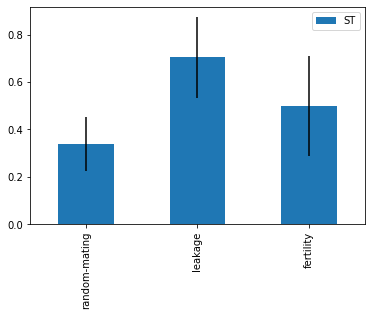

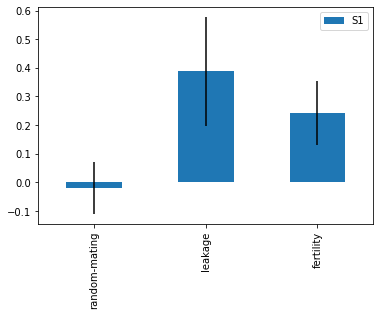

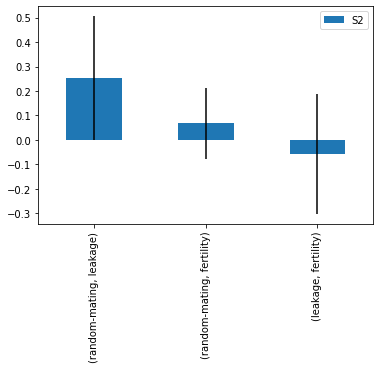

In [145]:
st = barplot(total)
plt.savefig("../output/plots/sobol-st.pdf", bbox_inches='tight')
s1 = barplot(first)
plt.savefig("../output/plots/sobol-s1.pdf", bbox_inches='tight')
s2 = barplot(second)
plt.savefig("../output/plots/sobol-s2.pdf", bbox_inches='tight')

# EFast

In [87]:
param_values = fast_sampler.sample(problem, 1000)

In [89]:
t = pd.DataFrame(param_values)
t.columns = ["random-mating", "leakage", "fertility"]
t.to_csv("../models/fertility-BMI/data/param-efast.csv", index=False)
len(t)

3000

In [92]:
df = pd_read_pattern('../models/fertility-BMI/output/group*.csv', sep=";")
params = pd_read_pattern('../models/fertility-BMI/output/par*.csv', sep=";")
df.iteration = df.iteration.astype(float)
df = df.sort_values(by=['iteration'])
df.to_csv("../output/data/results-efast.csv", index=False)
Y = df.g4.to_numpy()

In [97]:
len(Y)

3000

In [98]:
Sif = fast.analyze(problem, Y, print_to_console=True)

                     S1        ST   S1_conf   ST_conf
random-mating  0.066447  0.356710  0.007989  0.029383
leakage        0.395304  0.714124  0.007835  0.025784
fertility      0.209558  0.424719  0.008097  0.027309


<AxesSubplot:>

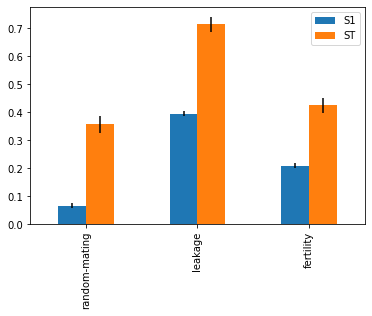

In [102]:
Sif.plot()